In [1]:
import os
import urllib

# Download the data
API_KEY = "PO6RG0NM9390YF3A"
STOCK_SYMBOL = "SPY"
INTERVAL = "1min"
DATA_TYPE = "MONTHLY" # INTRADAY || DAILY || WEEKLY || MONTHLY

if DATA_TYPE == "intraday":
    DOWNLOAD_ROOT = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={STOCK_SYMBOL}&interval={INTERVAL}&apikey={API_KEY}&datatype=csv&ouputsize=full"
else:
    DOWNLOAD_ROOT = f"https://www.alphavantage.co/query?function=TIME_SERIES_{DATA_TYPE}&symbol={STOCK_SYMBOL}&apikey={API_KEY}&datatype=csv&ouputsize=full"
filename = STOCK_SYMBOL+"_"+DATA_TYPE+".csv"
datapath = "rawdata/"
os.makedirs(datapath, exist_ok=True)
urllib.request.urlretrieve(DOWNLOAD_ROOT, datapath+filename)
print('Download complete.')

Download complete.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

stock_data = pd.read_csv(datapath + filename, thousands=',')

stock_data = stock_data.iloc[::-1]
print(stock_data)

      timestamp      open      high       low     close      volume
239  2000-06-30  143.6875  149.1562  143.0000  145.2812   127146000
238  2000-07-31  145.4375  151.9843  141.5156  143.0000   106780100
237  2000-08-31  143.6250  153.0937  142.6250  152.3437   102365500
236  2000-09-29  153.2500  153.5937  142.1250  143.6250   113203000
235  2000-10-31  144.2812  145.7500  130.1562  142.9531   178392400
..          ...       ...       ...       ...       ...         ...
4    2020-01-31  323.5400  332.9500  320.3600  321.7300  1389179454
3    2020-02-28  323.3500  339.0800  285.5400  296.2600  2099672006
2    2020-03-31  298.2100  313.8400  218.2600  257.7500  5888710884
1    2020-04-30  247.9800  294.8800  243.9000  290.4800  2798273802
0    2020-05-27  285.3100  302.2200  272.9900  301.6484  1658262704

[240 rows x 6 columns]


In [3]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
from matplotlib import cm
import datetime as dt
rowNum = 1
timeRow = []
for index, row in stock_data.iterrows():
    timeRow.append(rowNum)
    rowNum += 1
stock_data['timestamp'] = timeRow

X = stock_data[['timestamp', 'low', 'high', 'open']]
y = stock_data['close']
print(stock_data)

     timestamp      open      high       low     close      volume
239          1  143.6875  149.1562  143.0000  145.2812   127146000
238          2  145.4375  151.9843  141.5156  143.0000   106780100
237          3  143.6250  153.0937  142.6250  152.3437   102365500
236          4  153.2500  153.5937  142.1250  143.6250   113203000
235          5  144.2812  145.7500  130.1562  142.9531   178392400
..         ...       ...       ...       ...       ...         ...
4          236  323.5400  332.9500  320.3600  321.7300  1389179454
3          237  323.3500  339.0800  285.5400  296.2600  2099672006
2          238  298.2100  313.8400  218.2600  257.7500  5888710884
1          239  247.9800  294.8800  243.9000  290.4800  2798273802
0          240  285.3100  302.2200  272.9900  301.6484  1658262704

[240 rows x 6 columns]


# Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

linear model coeff (w): [ 0.00864723  0.64401578  0.83853151 -0.48921793]
linear model intercept (b): 0.044
R-squared score (training): 0.998
R-squared score (test): 0.998
RMSE: 2.628


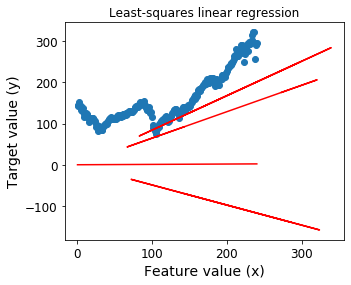

In [65]:
from sklearn import metrics

print('linear model coeff (w): {}'.format(linreg.coef_))

print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))

print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))

print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))


# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))


plt.figure(figsize=(5,4))
plt.scatter(X['timestamp'], y)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [66]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[ 95.82    130.068   100.254   129.992    95.82    292.51854 167.59
 280.118   148.176   217.976   137.854   240.444   149.918   174.908
 302.24054 125.64    199.01016 107.686   273.076   127.64812  88.39
 207.984   149.918   109.29    142.9531  112.04    224.918   128.594
 121.8975  185.77    118.878   112.534   141.752   122.212   134.12
 115.6     138.066   195.208   121.774   137.99    152.984   112.534
 295.50854 113.44     89.736   108.652    89.736   133.36436 107.686
 293.05654 123.084   148.176   302.24054 132.05    135.328    86.636
 295.50854 174.908   107.11    194.292  ]
R-squared test score: 0.991


# Linear Regression with Gradient Descent

In [48]:
X_b = np.c_[np.ones((240,1)), X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [53]:
X_new = np.array([[0],[240]])
X_new_b = np.c_[np.ones((240,1)), X]

y_predict = X_new_b.dot(theta)
print(y_predict)

[2.06156961e+35 2.08057353e+35 2.08619479e+35 2.13556438e+35
 2.00411046e+35 1.98930268e+35 1.90789362e+35 1.91123690e+35
 1.90920670e+35 1.73887103e+35 1.70922265e+35 1.84221664e+35
 1.82380415e+35 1.77069902e+35 1.74388262e+35 1.59174415e+35
 1.56780966e+35 1.62236418e+35 1.69562115e+35 1.68765559e+35
 1.65723913e+35 1.69268305e+35 1.67649152e+35 1.62039487e+35
 1.55760843e+35 1.40605845e+35 1.37063889e+35 1.35673261e+35
 1.29382619e+35 1.39064472e+35 1.43182782e+35 1.38009779e+35
 1.32235273e+35 1.32943818e+35 1.37255685e+35 1.45419447e+35
 1.53735961e+35 1.53732082e+35 1.54938957e+35 1.59200256e+35
 1.59962893e+35 1.64976356e+35 1.69162057e+35 1.76446792e+35
 1.78729028e+35 1.78307263e+35 1.77739065e+35 1.74965559e+35
 1.78408902e+35 1.77695281e+35 1.75025263e+35 1.77562076e+35
 1.78528200e+35 1.83443385e+35 1.89283167e+35 1.90691041e+35
 1.90244087e+35 1.91738367e+35 1.87919615e+35 1.88134401e+35
 1.92757111e+35 1.94193093e+35 1.97650988e+35 1.97426887e+35
 1.95706582e+35 1.984189

In [50]:
eta = 0.1
n_iterations = 10
m = 100
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([2.55634016e+30, 3.72397478e+32, 4.55992586e+32, 4.87176907e+32,
       4.72620175e+32])

In [51]:
X_b.dot(theta)

array([2.06156961e+35, 2.08057353e+35, 2.08619479e+35, 2.13556438e+35,
       2.00411046e+35, 1.98930268e+35, 1.90789362e+35, 1.91123690e+35,
       1.90920670e+35, 1.73887103e+35, 1.70922265e+35, 1.84221664e+35,
       1.82380415e+35, 1.77069902e+35, 1.74388262e+35, 1.59174415e+35,
       1.56780966e+35, 1.62236418e+35, 1.69562115e+35, 1.68765559e+35,
       1.65723913e+35, 1.69268305e+35, 1.67649152e+35, 1.62039487e+35,
       1.55760843e+35, 1.40605845e+35, 1.37063889e+35, 1.35673261e+35,
       1.29382619e+35, 1.39064472e+35, 1.43182782e+35, 1.38009779e+35,
       1.32235273e+35, 1.32943818e+35, 1.37255685e+35, 1.45419447e+35,
       1.53735961e+35, 1.53732082e+35, 1.54938957e+35, 1.59200256e+35,
       1.59962893e+35, 1.64976356e+35, 1.69162057e+35, 1.76446792e+35,
       1.78729028e+35, 1.78307263e+35, 1.77739065e+35, 1.74965559e+35,
       1.78408902e+35, 1.77695281e+35, 1.75025263e+35, 1.77562076e+35,
       1.78528200e+35, 1.83443385e+35, 1.89283167e+35, 1.90691041e+35,
      

In [54]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

ValueError: shapes (240,5) and (240,1) not aligned: 5 (dim 1) != 240 (dim 0)

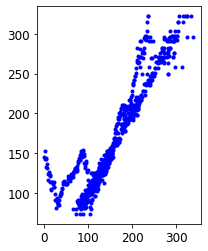

In [62]:
np.random.seed(42)
theta = np.random.randn(240,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

# Regularized Linear Regression

## Ridge Regression

In [67]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 0.050166181625542094
ridge regression linear model coeff:
[ 0.00872125  0.64273312  0.83232051 -0.48166375]
R-squared score (training): 0.998
R-squared score (test): 0.998
Number of non-zero features: 4


In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 98.2645910775835
ridge regression linear model coeff:
[38.45554244 42.36824534 44.23752511 43.33608165]
R-squared score (training): 0.877
R-squared score (test): 0.861
Number of non-zero features: 4


In [61]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 4, r-squared training: 1.00, r-squared test: 1.00

Alpha = 1.00
num abs(coeff) > 1.0: 4, r-squared training: 0.99, r-squared test: 0.99

Alpha = 10.00
num abs(coeff) > 1.0: 4, r-squared training: 0.94, r-squared test: 0.93

Alpha = 20.00
num abs(coeff) > 1.0: 4, r-squared training: 0.88, r-squared test: 0.86

Alpha = 50.00
num abs(coeff) > 1.0: 4, r-squared training: 0.69, r-squared test: 0.67

Alpha = 100.00
num abs(coeff) > 1.0: 4, r-squared training: 0.50, r-squared test: 0.48

Alpha = 1000.00
num abs(coeff) > 1.0: 4, r-squared training: 0.08, r-squared test: 0.07



## Lasso Regression

In [57]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: 89.19810034204993
lasso regression linear model coeff:
[  6.93655394  37.01612056 173.33301446   0.        ]
Non-zero features: 3
R-squared score (training): 0.975
R-squared score (test): 0.973

Features with non-zero weight (sorted by absolute magnitude):
	high, 173.333
	low, 37.016
	timestamp, 6.937


In [58]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 3, r-squared training: 1.00, r-squared test: 1.00

Alpha = 1.00
Features kept: 3, r-squared training: 0.99, r-squared test: 0.99

Alpha = 2.00
Features kept: 3, r-squared training: 0.98, r-squared test: 0.97

Alpha = 3.00
Features kept: 2, r-squared training: 0.95, r-squared test: 0.95

Alpha = 5.00
Features kept: 2, r-squared training: 0.88, r-squared test: 0.87

Alpha = 10.00
Features kept: 2, r-squared training: 0.54, r-squared test: 0.52

Alpha = 20.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 50.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00



# Polynomial Regression